In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load in the Data:

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

170500096/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [ ]:
# Number of classes 
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x) 
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)


In [ ]:
# Compile and fit
# Note: make sure your using GPU!

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5553 - accuracy: 0.4325 - val_loss: 1.2475 - val_accuracy: 0.5468
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2694 - accuracy: 0.5415 - val_loss: 1.1099 - val_accuracy: 0.5991
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1358 - accuracy: 0.5916 - val_loss: 1.0416 - val_accuracy: 0.6300
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0460 - accuracy: 0.6272 - val_loss: 1.0292 - val_accuracy: 0.6345
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9749 - accuracy: 0.6531 - val_loss: 0.9373 - val_accuracy: 0.6724
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9125 - accuracy: 0.6736 - val_loss: 0.9094 - val_accuracy: 0.6837
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8637 - accuracy: 0.6927 - val_loss: 0.8661 - val_accuracy:

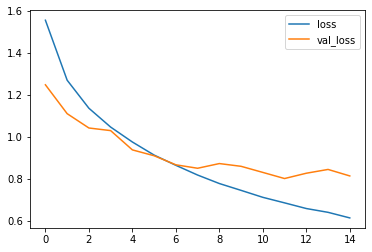

In [ ]:
#plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

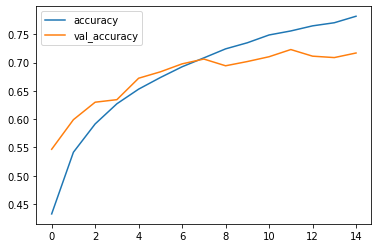

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion Matrix without normalization
[[746  16  35  21  33   3   9   9  86  42]
 [ 14 841   6   8   5   4   6   4  28  84]
 [ 68   6 523  74 172  54  58  16  18  11]
 [ 15   7  54 582  89 146  49  27  13  18]
 [ 19   3  38  78 756  23  31  38  11   3]
 [  6   3  36 228  85 568  18  39   7  10]
 [ 11   5  24  84  67  26 762   8   7   6]
 [ 15   2  28  50  81  66   7 730   7  14]
 [ 43  22   8  13  10   4   6   2 871  21]
 [ 26  83   9  12  11  11   6  14  37 791]]


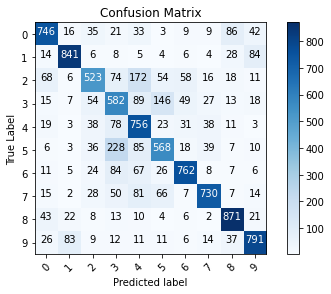

In [ ]:
#Plot Confusion Matrix:

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm ,classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap=plt.cm.Blues):

  if normalize:
    cm =cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalize Confusion Matrix")
  else:
    print("Confusion Matrix without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)


  fmt='.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
            horizontalalignment="center",
            color = "white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label Mapping:

labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

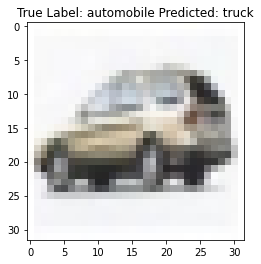

In [ ]:
# Show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));